## Predicting whether mushroom is Edible (good) or poisonous based on various features of mushrooms on "mushrooms.csv" dataset using Machine Learning algorithms.
<b> In this article, we will use the same dataset "mushrooms.csv", which we have used in previous in AdaBoost Algorithm and Gradient Boosting Classifier. By using the same dataset, we can compare the Extreme Gradient Boosting classifier with AdaBoost Algorithm and Gradient Boosting Classifier. Here we are going to predict whether mushroom is Edible (good) or poisonous based on various features of mushrooms on "mushrooms.csv" dataset using Machine Learning algorithms. The algorithms included Extreme Gradient Boosting Classifier (XGBM).


## Step - 1 : Business Problem Understanding
<b> Develop a predictive model to identify whether mushroom is Edible (good) or poisonous based on various features of mushrooms.
    
<b> A general guideline for features, people should look out for when picking mushrooms.
    
<b> In this project we will dive into mushroom classification problem which is represented by a tabular dataset that contains 23 features and 8124 observations, labeled as edible or poisonous mushroom. The goal is to classify mushrooms as either edible or poisonous.

    

<b> Installing XGBoost using jupiter notebook.

In [1]:
# Installing XGBoost using jupiter notebook.
!pip install xgboost

<b> importing all the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [3]:
# Load the dataset.
df = pd.read_csv("mushrooms.csv")

# Display the first 5 lines using the head() method.
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2.2 Data Understanding


<b> predict whether mushroom is Edible (good) or poisonous based on various features of mushrooms on mushrooms.csv dataset. 
    
A mushroom or toadstool is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground, on soil, or on its food source (from wikipedia). Contains variables:
    
1. class: Edible or poisonous, i.e. e = Edible, p = poisonous
2. cap-shape: The shape of the expanded, upper part of the mushroom, i.e. bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3. cap-surface: The structure of the upper part of the mushroom, i.e. fibrous=f,grooves=g,scaly=y,smooth=s
4. cap-color: The color of the surface of the upper part of the mushroom, i.e. brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
5. bruises: Indicates of there are bruises on the mushroom, i.e. bruises=t,no=f
6. odor: The smell the mushroom omits, i.e. almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
7. gill-attachment: The way the gill is growing on the mushroom, i.e. attached=a,descending=d,free=f,notched=n
8. gill-spacing: The gap of space between each gill, i.e. close=c,crowded=w,distant=d
9. gill-size: The size of the gills, i.e. broad=b,narrow=n
10. gill-color: 	The color of the gills, i.e. black=k,brown=n,buff=b,chocolate=h,gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
11. stalk-shape: The Stalk`s form, i.e. enlarging=e,tapering=t
12. stalk-root: The root of the mushroom, i.e. bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
13. stalk-surface-above-ring: The surface of the stalk above the mushrooms ring, i.e. fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-surface-below-ring: The surface of the stalk below the mushrooms ring, i.e. fibrous=f,scaly=y,silky=k,smooth=s
15. stalk-color-above-ring: The color of the stalk above the mushrooms ring, i.e. brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p, red=e, white=w, yellow=y
16. stalk-color-below-ring: The color of the stalk below the mushrooms ring, i.e. brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
17. veil-type: The type of the mushroom`s veil, i.e. partial=p,universal=u
18. veil-color: The color of the mushroom`s veil, i.e. brown=n,orange=o,white=w,yellow=y
19. ring-number: The amount fo rings the mushroom, i.e. hasnone=n,one=o,tw, i.e. o=t
20. ring-type: The type of the mushroom`s ring, i.e. cobwebby=c,evanescent=e,flaring=f,large=l, none=n, pendant=p, sheathing=s, zone=z
21. spore-print-color: The color of the mushromm`s spore, i.e. black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
22. population: The population spread, i.e. abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
23. habitat: The mushroom`s environment, i.e. grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
    
    

<b> Let’s have a look at data dimensionality.

In [4]:
df.shape

(8124, 23)

<b> From the output, we can see that the table contains 8124 rows and 23 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<b> object is the data type of all features. We see 23 features are categorical. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 8124 observations, the same number of rows we saw before with shape.
   

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)


<b> For categorical (type object) features we can use the value_counts method. Let's have a look at the distribution of all the features:
    
<b> Checking the unique values/categories from the target variable (class). 

In [6]:
df["class"].unique()

array(['p', 'e'], dtype=object)

<b> As we can see, there are 2 unique values in the target variable (class), i.e. 'p' and 'e'.

<b> Now use the value_counts method on target variable (class).

In [7]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<b> e=4208 and p=3916 Out-of 8124 records.

### 3.2 Data Visualization :
<b> We will make a detailed plot for our target ("class") to get a clear idea of it's distribution:

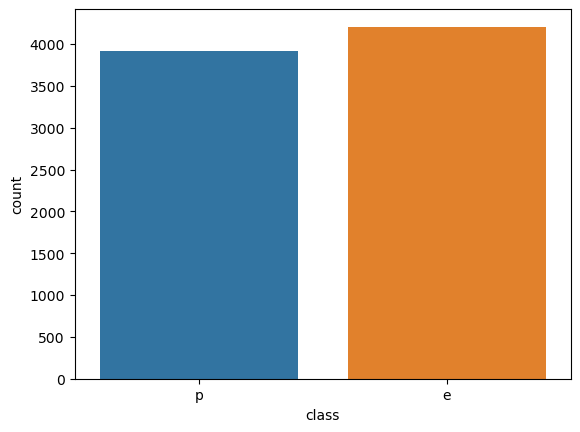

In [8]:
# Draw the countplot with class Vs count.
# Pass data=df.
# Pass x="class"
sns.countplot(x="class", data=df)

# Display all figures.
plt.show()

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


### 3.3 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [11]:
# Check the missing values records.
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<b> In the above, we can see that there is no missing values.

### 3.4 Encoding
<b> In this data set all the variables are categorical variables. We have to convert these variables into dummy/indicator variables, here we are doing it using pandas get_dummies:
    
<b> Here we are applying encoding on independent variables and dependent variables are seperatelly.
    

In [12]:
# Apply the Encoding on independent variables by using LabelEncoder() on "df" object.

# drop the target variable and store it as "input_data" object.
input_data = df.drop("class", axis=1)

# Apply the Encoding by using get_dummies() on "df1" object.
df1 = pd.get_dummies(input_data, drop_first=True)

# print the "df1" object.
df1

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


<b> Now applying encoding on dependent variable.

In [13]:
# Apply the Encoding by using get_dummies() on "df["class"]".
df2 = pd.get_dummies(df["class"], drop_first=True)

# print the "df2" object.
df2

,p
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


### 3.5 Train/Test Split
<b> Creating independent variables i.e. df1 as "x" variable and dependent variable "species" as "y" variable.

In [14]:
# Create independent variables as "x" and dependent variable as "y" object.

# Create the independent variable as x.
x = df1

# target variable to predict/ dependant variable
y = df2                                                       

In [15]:
# Print the x variable.
x

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [16]:
# Print the y variable.
y

,p
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


<b> In the above, I have created x variable with 22 independent (input) variables and y variable with 1 dependent (output) variable.

In [17]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# splitiing data for training and testing
# 80% training, 20% testing and random_state=101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of x_train, x_test, y_train, y_test

In [18]:
x_train.shape, x_test.shape

((6499, 95), (1625, 95))

In [19]:
y_train.shape, y_test.shape

((6499, 1), (1625, 1))

## Step - 4 : (XGBM) Extreme Gradient Boosting Classifier Modelling and Evaluation with default Prameters:
<b> (XGBM) Extreme Gradient Boosting Classifier (Baseline Model)

In [20]:
# Modelling
# import the XGBClassifier from xgboost library.
from xgboost import XGBClassifier

# Create the classifier object (model) as "xgb_default".
xgb_default = XGBClassifier()

# Train the model using training sets
xgb_default.fit(x_train, y_train)

# Prediction
# Predict on the train data set.
train_predictions = xgb_default.predict(x_train)

# Predict on the test data set.
test_predictions = xgb_default.predict(x_test)

# Evaluation
# import the accuracy_score class from sklearn.metrics library
from sklearn.metrics import accuracy_score

# print the train accuary
print("Train_accuracy:", accuracy_score(y_train, train_predictions))

# print the test accuracy
print("Test_accuracy:", accuracy_score(y_test, test_predictions))

# Cross Validation Score
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(xgb_default, x, y, cv=5).mean())

Train_accuracy: 1.0
Test_accuracy: 1.0
Cross Validation Score: 0.9335172413793102


In the above, we have fitted the Extreme Gradient Boosting Classifier to the training data. First we have imported the XGBClassifier() class of xgboost library. After importing the class, we have created the Classifier object of the class. The Parameter of this class are as :

- base_estimator (default=None): The base estimator from which the boosted ensemble is built.
- n_estimators : Number of boosting rounds.
- max_depth : Maximum tree depth for base learners.
- learning_rate (default=1.0): Weight applied to each classifier at each boosting iteration.
- gamma : (min_split_loss) Minimum loss reduction required to make a further partition on a
- random_state: The seed for the random number generator, by default it's None.

    
And then we have fitted the classifier to the training data. After that we have predicted the test and train results.


And finally we have done with evaluation i.e. train accuracy, test accuray and crooss validation score.

<b>  Extreme Gradient Boosting Classifier with default parameters, the training set and testing set performances are comparable. But the cross validate score performances are not comparable with the training set and testing set. So we conclude that, we have got a bad model on train and test data sets. We got an train accuracy of 100%, test accuracy of 100% and cross validate score of 93,35% with this model.

## Hyper Parameter Tuning for  Extreme Gradient Boosting Classifier
<b> Here we are using GridSearchCV() function. GridSearchCV() function is used to identify the best value (parameter) within given dat by appling cross validation (CV).
    
<b> Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy.
    
    
Here We will use some hyperparamters as follows: 
    
   - estimator: estimator object, this is assumed to implement the scikit-learn estimator interface.
   - param_griddict or list of dictionaries: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
   - n_estimators (default=100): The number of trees in the forest.
   - learning_rate (default=0.1): Learning rate shrinks the contribution of each tree by `learning_rate`.
   - max_depth: The maximum depth of the tree. by default it's 3, then nodes are expanded until all leaves contain less than min_samples_split samples.
   - scoring: maximum accuracy.
   - gamma : (min_split_loss) Minimum loss reduction required to make a further partition on a
   - CV (default=5): Cross validation score.


In [21]:
# import the GridSearchCV from sklearn.model_selection library.
from sklearn.model_selection import GridSearchCV

# Model
estimator = XGBClassifier()

# Parameters and values.
param_grid = {'n_estimators':[10,20,40,100],
              "max_depth":[3,4,5],
              "gamma":[0,0.15,0.3,0.5,0.7,1]}
 
# Identify the best value of the parameter within given values for the given data.
grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

# fit the model on our train set.
grid.fit(x_train,y_train)

# get the best hyperparameters.
grid.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 40}

<b> From the above, we have got the best parameter, i.e. 'gamma': 0, 'max_depth': 3, 'n_estimators': 40

### Checking the importance of each feature givan by this model:
<b> Here we are going to check the importance of each fature by using feature_importances_
    
<b> Feature Importance is a score assigned to the features of a Machine Learning model that defines how “important” is a feature to the model's prediction. It can help in feature selection and we can get very useful insights about our data.

In [22]:
grid.best_estimator_.feature_importances_

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.6167567e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.3581199e-04,
       7.4817427e-03, 6.0288999e-02, 3.3926319e-03, 2.6485398e-02,
       7.9572327e-02, 3.7501424e-03, 2.8154403e-01, 1.7742589e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.0583990e-03,
       1.5913136e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.4226676e-04, 0.0000000e+00, 2.4518545e-01, 3.0659849e-06,
       1.7321397e-01, 2.1638423e-03, 1.1198281e-04, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.0072298e-02, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [23]:
# Displaying each variables with there feature_importances_ and same storing in "feats" object.
feats = pd.DataFrame(index=x.columns, data=grid.best_estimator_.feature_importances_, columns=["Feature Importance"])

# print the result.
feats

,Feature Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000016
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


<b> In the above, we can see that there are multiple features are least importance features, i.e. importance_features_score=0.01
    
<b> Now we are displaying importance features and same storing as "important_features" object.

In [24]:
# Store the importance features in "important_features" object.
important_features = feats[feats['Feature Importance']>0.01]

# Display the important features
important_features

,Feature Importance
bruises_t,0.060289
odor_f,0.026485
odor_l,0.079572
odor_n,0.281544
odor_p,0.017743
gill-size_n,0.015913
stalk-root_c,0.245185
stalk-root_r,0.173214
stalk-surface-below-ring_y,0.020072
stalk-color-below-ring_y,0.015691


<b> Now we are storing only importance features in a list as "importance_features_list".

In [25]:
# Store the importance features in "imp_features_list" object
imp_features_list = feats[feats['Feature Importance']>0.01].index.to_list()

# print the importance features list.
imp_features_list

['bruises_t',
 'odor_f',
 'odor_l',
 'odor_n',
 'odor_p',
 'gill-size_n',
 'stalk-root_c',
 'stalk-root_r',
 'stalk-surface-below-ring_y',
 'stalk-color-below-ring_y',
 'spore-print-color_r']

<b> From the above, we have got 11 features are important for this algorithm. So now we are rebuilding the Extreme Gradient Boosting Classifier Modelling and Evaluation with Best Hyper Prameters and importance features.

## Step - 4 : Extreme Gradient Boosting Classifier Modelling and Evaluation with Best Hyper Prameters and importance features:
<b> Rebuilding the Extreme Gradient Boosting Classifier with best hyperparameters and importance features.

In [26]:
# Create the importance features list from the "x" object as "x_imp".
x_imp = x[imp_features_list]

# Train/Test Split.
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# splitiing data for training and testing
# 80% training, 20% testing and random_state=101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Modelling
# import the XGBClassifier from xgboost library.
from xgboost import XGBClassifier

# Create the classifier object (model) as "xgb_bhp".
xgb_bhp = XGBClassifier(n_estimators=40, gamma=0, max_depth=3)

# Train the model using training sets
xgb_bhp.fit(x_train, y_train)

# Prediction
# Predict on the train data set.
train_predictions = xgb_bhp.predict(x_train)

# Predict on the test data set.
test_predictions = xgb_bhp.predict(x_test)

# Evaluation
# import the accuracy_score class from sklearn.metrics library
from sklearn.metrics import accuracy_score

# print the train accuary
print("Train_accuracy:", accuracy_score(y_train, train_predictions))

# print the test accuracy
print("Test_accuracy:", accuracy_score(y_test, test_predictions))

# Cross Validation Score
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(xgb_bhp, x, y, cv=5).mean())

Train_accuracy: 1.0
Test_accuracy: 1.0
Cross Validation Score: 0.9092563849943162


<b> From the above, Extreme Gradient Boosting Classifier with best parameters and importance features, the training set and testing set performances are comparable. But the cross validate score performances are not comparable with the training set and testing set. So we conclude that, we have got a bad model on train and test data sets. We got an train accuracy of 100%, test accuracy of 100% and cross validate score of 90.92% with this model.

### Creating the Confusion Matrix
<b> Now we will create the confusion matrix to determine the correct and incorrect predictions. Below is the code for it:

In [27]:
# Creating the Confusion matrix 

# import the confusion_matrix class from sklearn.metrics library.
from sklearn.metrics import confusion_matrix  

# Create the Confusion matrix and same store as "cm" object
cm= confusion_matrix(y_test, test_predictions)  

# Print the Confusion matrix.
cm

array([[851,   0],
       [  0, 774]], dtype=int64)

<b> As we can see in the above matrix, there are 0+0= 0 incorrect predictions and 851+774= 1625 correct predictions.

### Creating the Classification Report
<b> Now we are building the text report showing the main classification metrics, it will returns the text summary of the precision, recall, F1 score for each class.

In [28]:
# import the classification_report class from sklearn.metrics library
from sklearn.metrics import classification_report

# Calculate the classification_report
# pass the arrays (y_test and test_prediction)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<b> Draw the Barplot on important features Vs "Feature Importance".

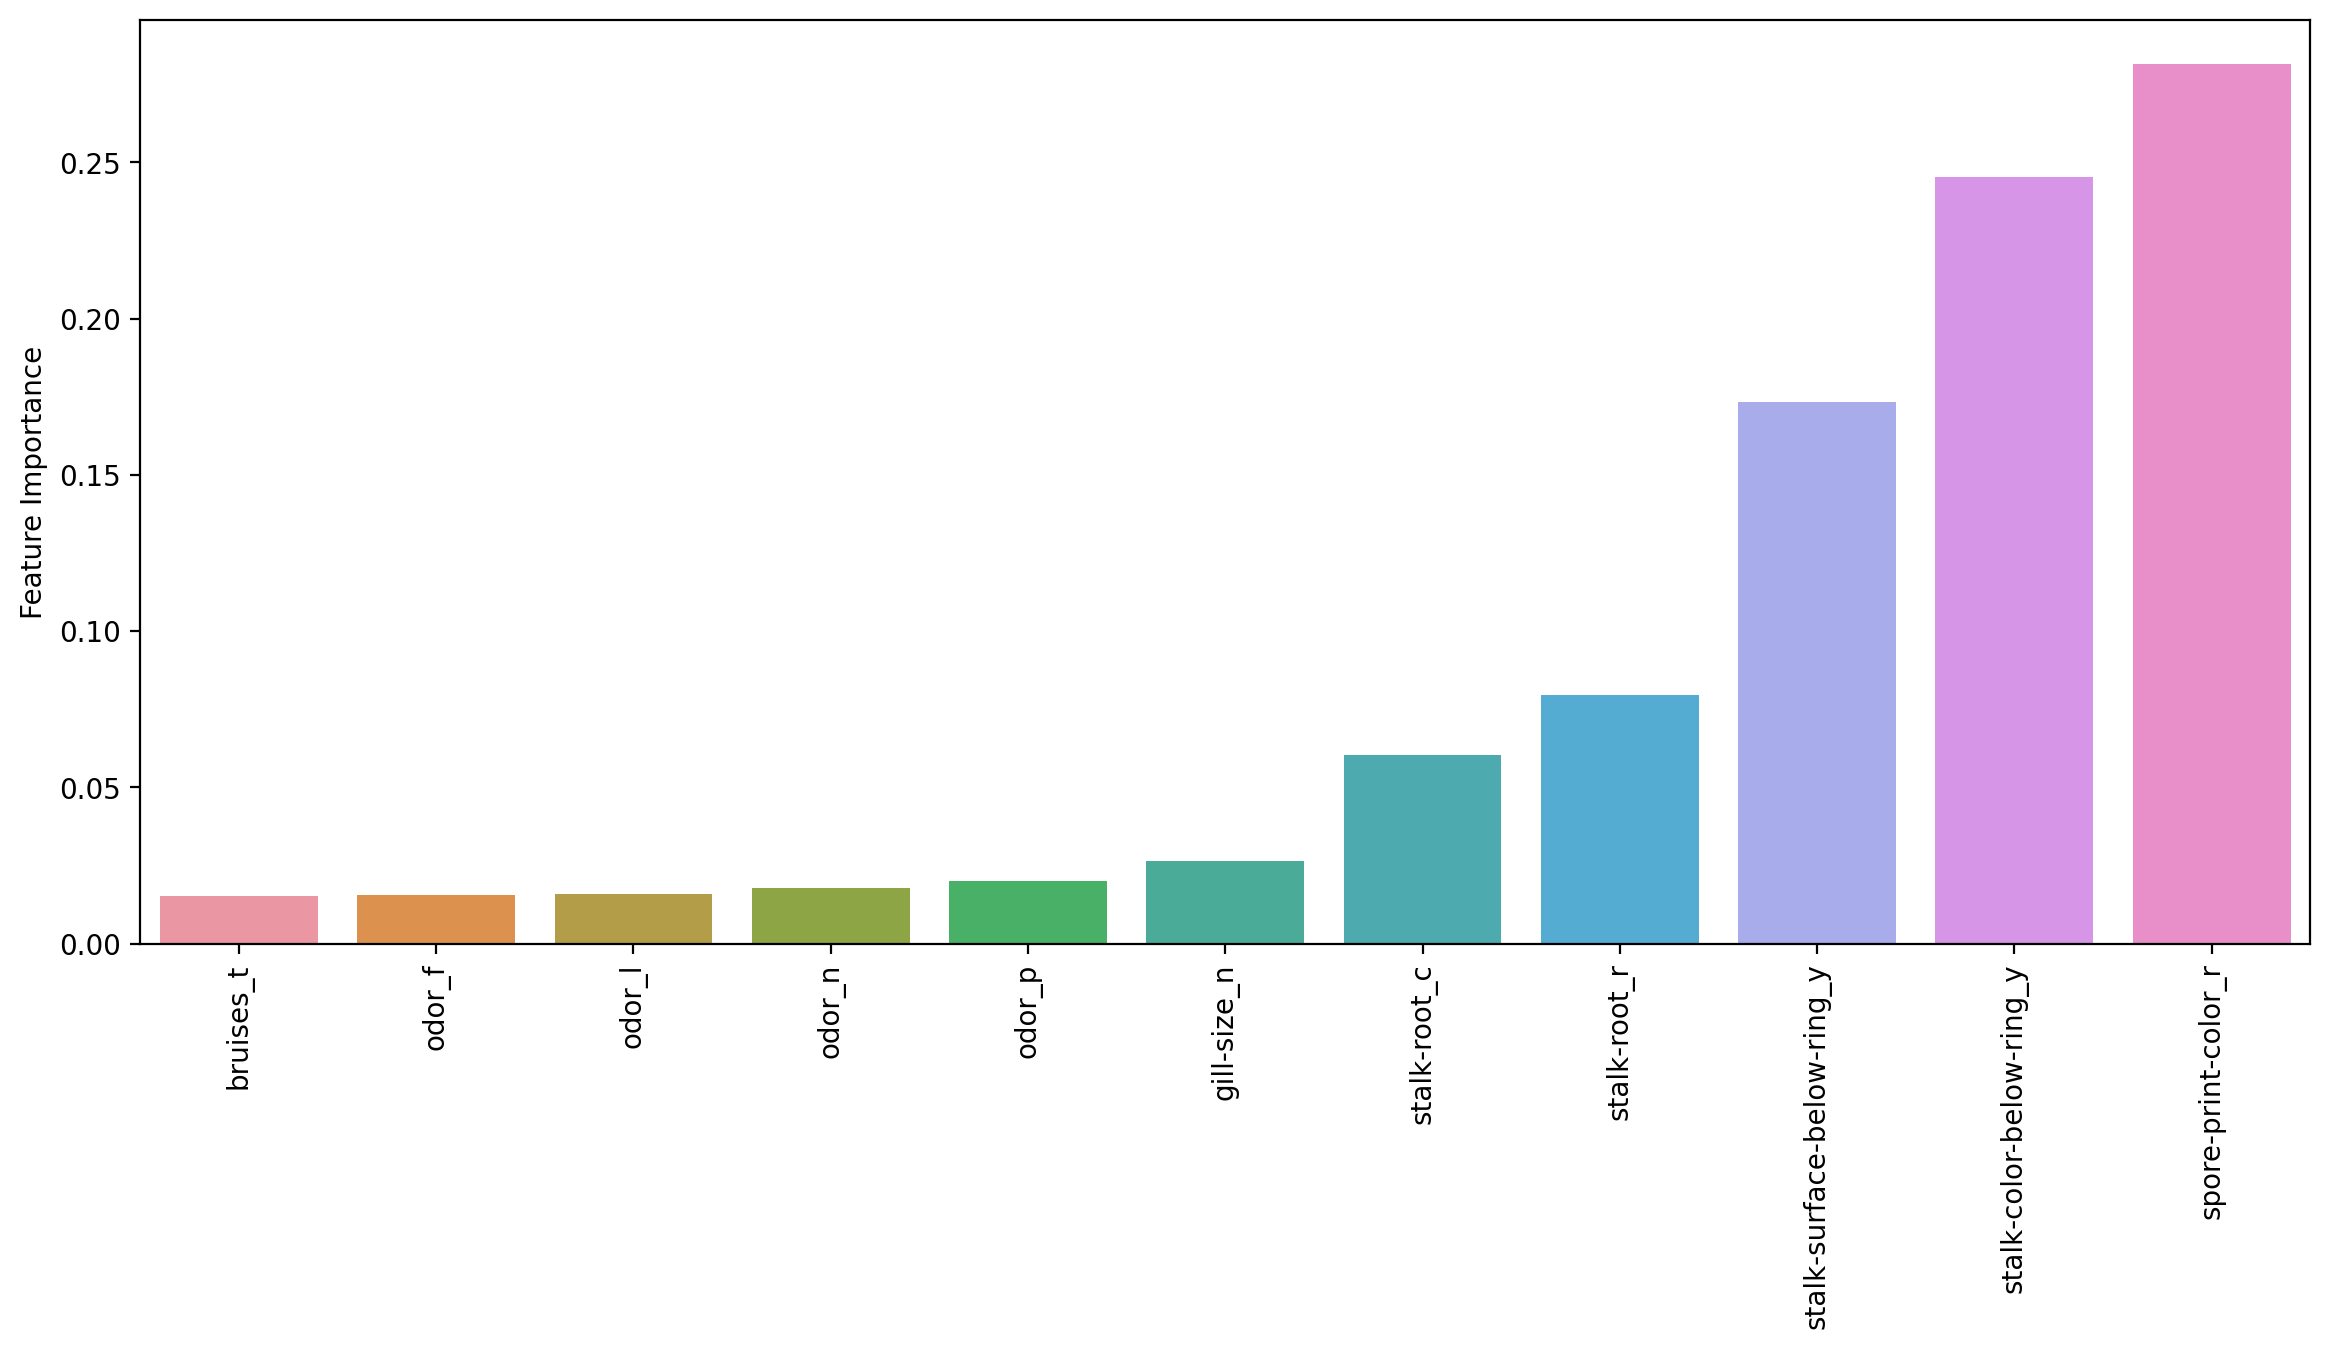

In [29]:
# Create a new figure with figsize=(14,6) and dpi=200.
plt.figure(figsize=(14,6), dpi=200)

# Draw the barplot.
sns.barplot(data=important_features.sort_values("Feature Importance"),
             x=important_features.index, y="Feature Importance")

# Display the result.
plt.xticks(rotation=90)
plt.show()

<b> In the above, we have drawn the barplot on important features Vs "Feature Importance". So we can easily see that each features with there importance for this dataset.